In [ ]:
import plotly.express as px
from tinyshift.series import trend_significance
from utilsforecast.preprocessing import fill_gaps
from utils import remove_leading_zeros, is_obsolete, forecastability, generate_lag
from tinyshift.plot import stationarity_check, seasonal_decompose, pami
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'])
df["unique_id"] = "1"
df.rename(columns={"Month": "ds", "Passengers": "y"}, inplace=True)
df = fill_gaps(df, freq="ME", end="per_serie", id_col="unique_id", time_col="ds")
df = df.groupby("unique_id")[df.columns].apply(remove_leading_zeros).reset_index(drop=True)
days_obsoletes=180
obsolete_series = df.groupby("unique_id")[df.columns].apply(is_obsolete, days_obsoletes)
obsolote_ids = obsolete_series[obsolete_series].index.tolist()
assert len(obsolote_ids) == 0, f"Obsolete series found: {obsolote_ids}"
df.groupby("unique_id")["y"].apply(trend_significance)

unique_id
1    (0.853638165603188, 4.020274506593391e-61)
Name: y, dtype: object

In [3]:
px.line(df, x="ds", y="y", facet_col="unique_id")

In [4]:
px.line(df, x="ds", y="y", facet_col="unique_id")

In [5]:
df.groupby("unique_id")["y"].apply(forecastability)

unique_id                   
1          foreCA                                               0.571263
           theoretical_limit                                    0.086973
           stability_index                                      0.183962
           adi_cv                             (1.0, 0.18190737443351804)
           hurst_exponent       (0.5203628364992473, 0.8044229708616066)
Name: y, dtype: object

# Stationarity Analysis

In [6]:
df["lag_1"] = generate_lag(df["y"], lag=1)
df["lag_12"] = generate_lag(df["lag_1"], lag=12)

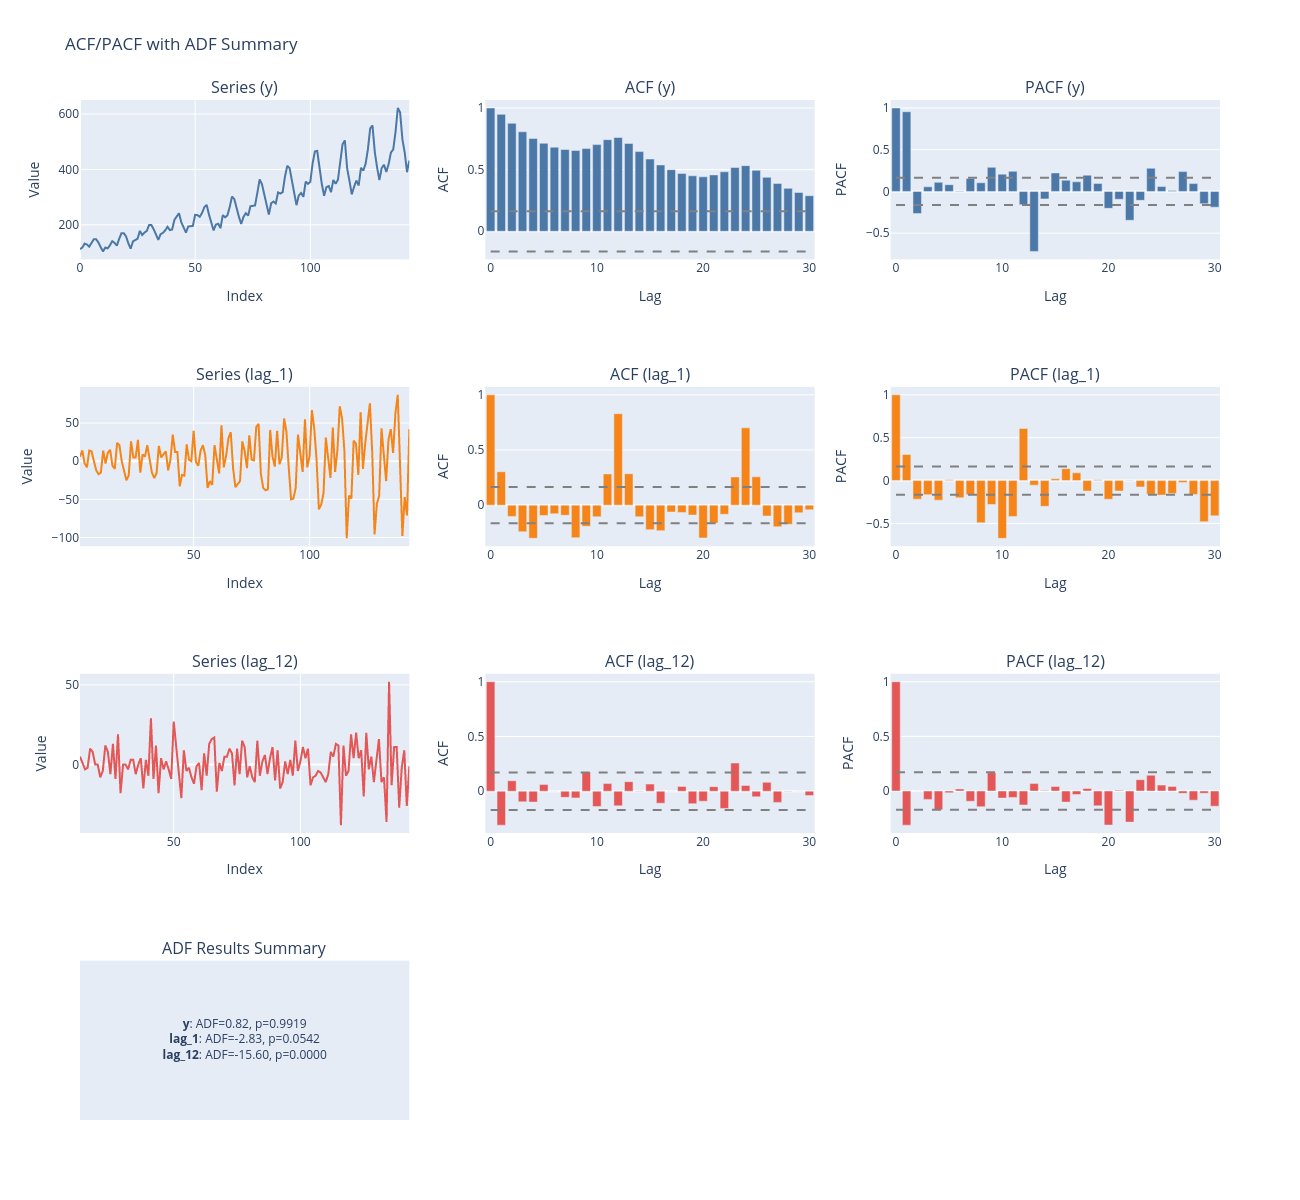

In [7]:
stationarity_check(df[["y", "lag_1", "lag_12"]], fig_type="png")

In [8]:
df.drop(columns=["lag_1", "lag_12"], inplace=True)

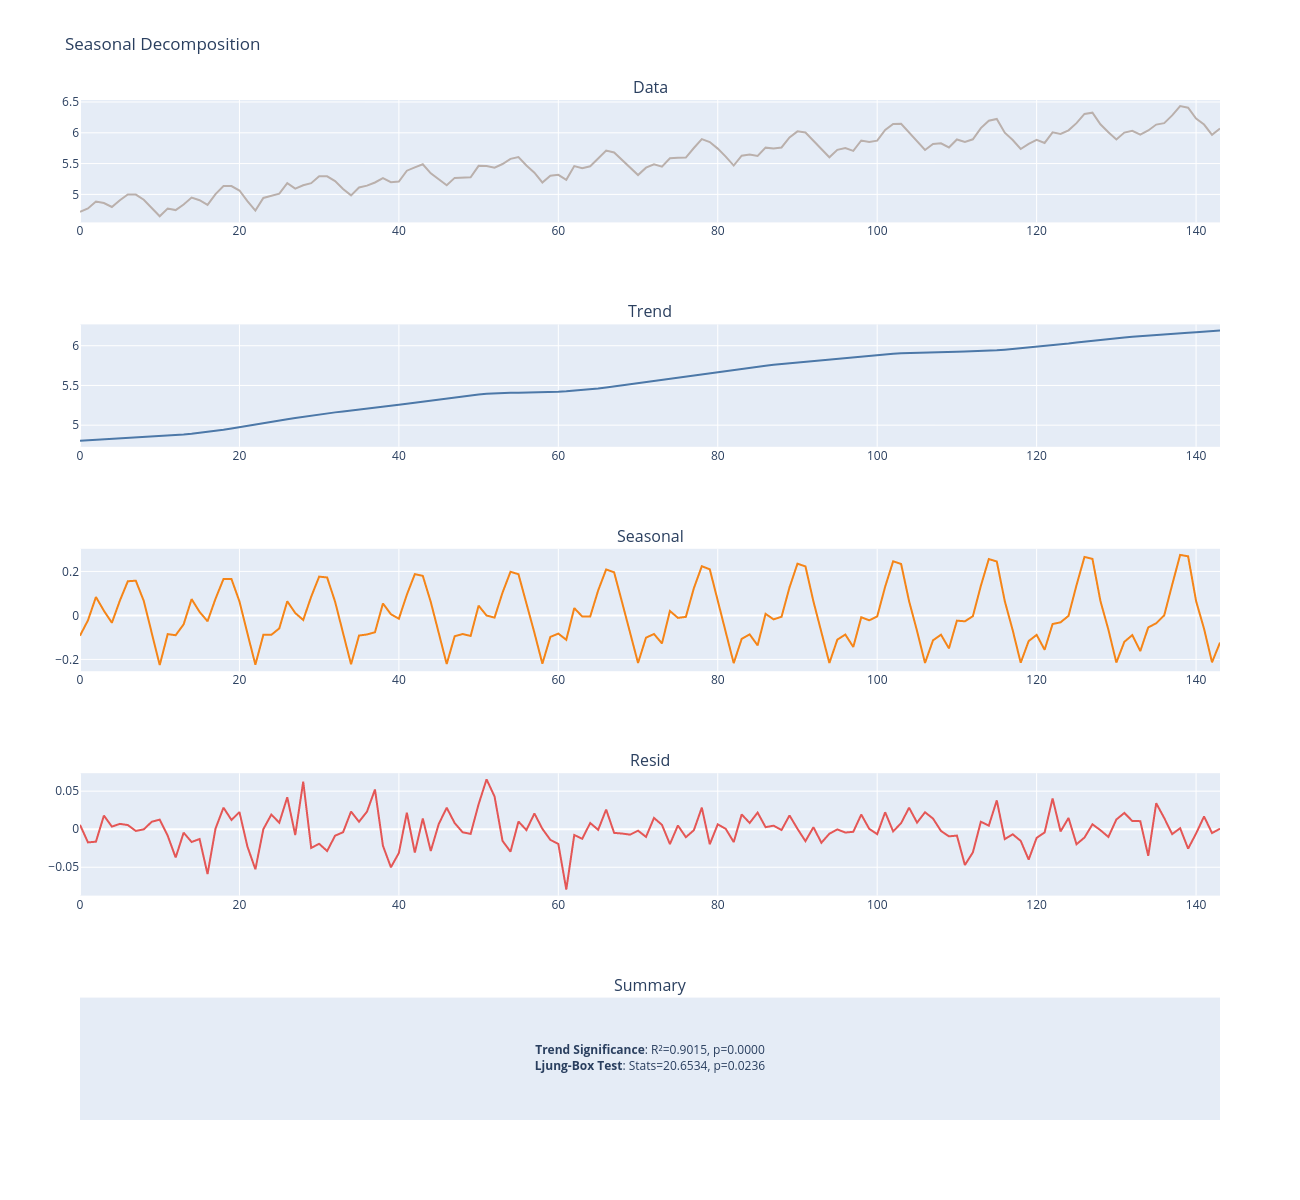

In [9]:
seasonal_decompose(np.log(df["y"]), periods=12, fig_type="png")

# PAMI

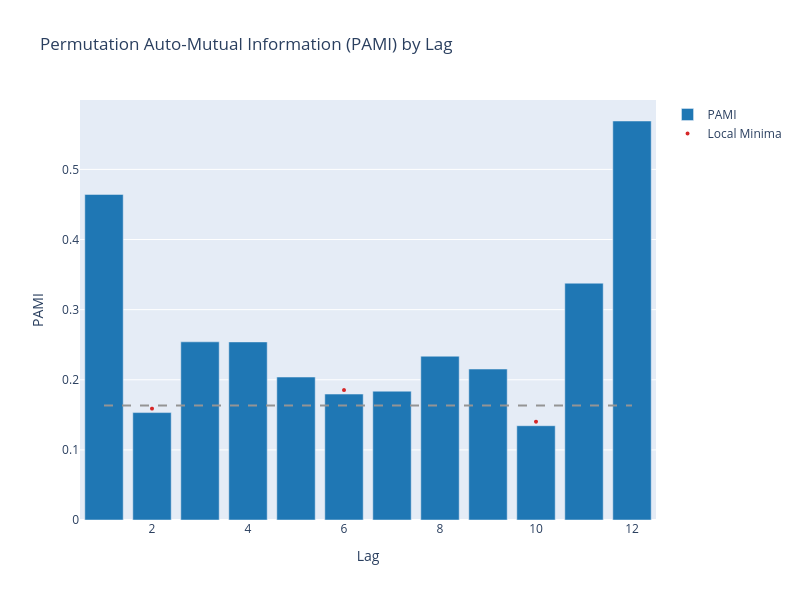

In [10]:
pami(df["y"], nlags=12, m=3, delay=1, normalize=True, fig_type="png")